Lê Phương Nam

ID:204427

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [419]:
data_custom=pd.read_csv("03_Customer_Behavior_Data.csv")
data_item=pd.read_csv("03_Item_Information_Data.csv")
data_shef=pd.read_csv("03_Shelf_Information_Data.csv")

$data custom$

Shelf ID: Mã kệ hàng


Person ID: Mã khách hàng


Timestamp: Thời điểm ghi nhận tương tác


Age: Tuổi


Gender: Giới tính


Height: Chiều cao


Weight: Cân nặng


Married status: Tình trạng hôn nhân


Moving speed (m/s): Tốc độ di chuyển


Item ID: Mã mặt hàng


Looking at item (s): Nhìn vào sản phẩm bao lâu (giây)


Holding the item (s): Cầm xem sản phẩm bao lâu (giây)


Holding the bag: Có cầm giỏ hàng hay không


Picking up item: Có hay không hành động nhặt sản phẩm lên


Returning item: Có hay không hành động trả lại sản phẩm vào kệ hàng


Putting item into bag: Có hay không hành động đặt sản phẩm vào giỏ hàng


Taking item out of bag:Có hay không hành động đặt sản phẩm vào giỏ hàng rồi nhưng lại lấy ra


Putting item into bag in the 2nd time:Có hay không hành động đã trả sản phẩm vào kệ rồi nhưng lại lấy sản phẩm ra

trả sản phẩm vào kệ rồi nhưng lại lấy sản phẩm ra



In [422]:
data_custom

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,25,39,True,True,True,True,True,False
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,32,35,False,True,False,True,True,True
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,30,28,False,True,False,True,True,True
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,54,56,False,True,False,False,True,False
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,16,25,False,True,False,False,True,True


$data item$

Shelf ID:	Mã kệ hàng


ItemID:	Mã mặt hàng


Name:	Tên mặt hàng


Origin:	Xuất xứ


Location:	Vị trí trên kệ hàng


Weight (g):	Khối lượng


Price:	Giá


NSX:	Ngày sản xuất


HSD:	Hạn sử dụng


Marketing strategy:	Có đang chạy chiến dịch quảng cáo không


Discount:	Giảm giá bao nhiêu phần trăm


Rate:	Điểm đánh giá 
 đánh giá 


In [425]:
data_item

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4
1,0,1,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3
2,0,2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,"40,000 ₫",2024-06-02,2026-06-02,False,0,3
3,0,3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,"13,400 ₫",2024-05-02,2026-05-02,False,0,3
4,0,4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,"17,000 ₫",2023-10-30,2024-04-16,True,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...
129,7,11,Pizza kitkool,Vietnam,Thấp,140.0,"33,000 ₫",2024-04-16,2024-06-10,False,0,4
130,7,12,Mý ý SG Food,Vietnam,Thấp,250.0,"27,000 ₫",2024-02-05,2024-09-03,False,0,4
131,7,13,Thanh cua Akira,Nhật Bản,Thấp,200.0,"58,500 ₫",2023-10-16,2023-12-19,False,0,4
132,7,14,Nước lẩu Barona,Vietnam,Thấp,180.0,"32,000 ₫",2023-12-02,2024-03-02,False,0,4


In [427]:
data_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shelf ID            134 non-null    int64  
 1   Item ID             134 non-null    int64  
 2   Name                134 non-null    object 
 3   Origin              134 non-null    object 
 4   Location            134 non-null    object 
 5   Weight (g)          110 non-null    float64
 6   Price               134 non-null    object 
 7   NSX                 100 non-null    object 
 8   HSD                 100 non-null    object 
 9   Marketing strategy  134 non-null    bool   
 10  Discount            134 non-null    int64  
 11  Rate                134 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 11.8+ KB


In [429]:
data_custom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shelf ID                               15394 non-null  int64  
 1   Person ID                              15394 non-null  int64  
 2   Timestamp                              15394 non-null  int64  
 3   Age                                    15394 non-null  int64  
 4   Gender                                 15394 non-null  object 
 5   Height                                 15394 non-null  int64  
 6   Weight                                 15394 non-null  int64  
 7   Married status                         15394 non-null  object 
 8   Moving speed (m/s)                     15394 non-null  float64
 9   Item ID                                15394 non-null  int64  
 10  Looking at item (s)                    15394 non-null  int64  
 11  Ho

In [431]:
data_custom.nunique()

Shelf ID                                    8
Person ID                                1500
Timestamp                                6491
Age                                        58
Gender                                      2
Height                                     32
Weight                                     50
Married status                              2
Moving speed (m/s)                        141
Item ID                                    25
Looking at item (s)                        60
Holding the item (s)                       50
Holding the bag                             2
Picking up item                             2
Returning item                              2
Putting item into bag                       2
Taking item out of bag                      2
Putting item into bag in the 2nd time       2
dtype: int64

In [433]:
df1 = pd.merge(data_custom,data_item,on=['Shelf ID', 'Item ID'], how='left')
df1.nunique()

Shelf ID                                    8
Person ID                                1500
Timestamp                                6491
Age                                        58
Gender                                      2
Height                                     32
Weight                                     50
Married status                              2
Moving speed (m/s)                        141
Item ID                                    25
Looking at item (s)                        60
Holding the item (s)                       50
Holding the bag                             2
Picking up item                             2
Returning item                              2
Putting item into bag                       2
Taking item out of bag                      2
Putting item into bag in the 2nd time       2
Name                                      134
Origin                                     11
Location                                    3
Weight (g)                        

Lấy ra mã kệ hàng tương ứng với mã mặt hàng ở data_item

In [436]:
fixed_data = data_item.groupby('Item ID')['Shelf ID'].unique().reset_index()
fixed_data

,Item ID,Shelf ID
0,0,"[0, 1, 2, 3, 4, 5, 6, 7]"
1,1,"[0, 1, 2, 3, 4, 5, 6, 7]"
2,2,"[0, 1, 2, 3, 4, 5, 6, 7]"
3,3,"[0, 1, 2, 3, 4, 5, 6, 7]"
4,4,"[0, 1, 2, 3, 4, 5, 6, 7]"
5,5,"[0, 1, 2, 3, 4, 5, 6, 7]"
6,6,"[0, 1, 2, 3, 4, 5, 6, 7]"
7,7,"[0, 1, 2, 3, 4, 5, 6, 7]"
8,8,"[0, 1, 2, 3, 4, 5, 6, 7]"
9,9,"[0, 1, 3, 4, 5, 6, 7]"


Lấy tên mặt hàng xuất hiện tại kệ hàng 

In [439]:
fixe_data = data_item.groupby('Name')['Shelf ID'].unique().reset_index()
fixe_data

,Name,Shelf ID
0,4 hộp sữa lúa mạch Milo 180ml,[2]
1,Bia 333,[3]
2,Bia Sài Gòn Special,[3]
3,Bibigo Mandu,[7]
4,Bim bim Oishi,[0]
...,...,...
129,Ðường kính Toàn Phát,[4]
130,Ðường phèn Biên Hoà,[4]
131,Ðậu xanh,[3]
132,Ðậu đỏ,[3]


Kết hợp Item,Name,Shelf

In [442]:
fixe_da = data_item.groupby(['Name','Item ID'])['Shelf ID'].unique().reset_index()
fixe_da

,Name,Item ID,Shelf ID
0,4 hộp sữa lúa mạch Milo 180ml,2,[2]
1,Bia 333,17,[3]
2,Bia Sài Gòn Special,18,[3]
3,Bibigo Mandu,9,[7]
4,Bim bim Oishi,6,[0]
...,...,...,...
129,Ðường kính Toàn Phát,10,[4]
130,Ðường phèn Biên Hoà,11,[4]
131,Ðậu xanh,0,[3]
132,Ðậu đỏ,1,[3]


Có thể thấy mỗi mặt hàng hay thuộc tính Name có một cặp Shelf và Item_ID riêng

Dựa vào 2 phương thức Shelf ID và Item ID ta sẽ điền tên mặt hay tìm được tên mặt vào vào bảng data_custom

In [446]:
merged_data = pd.merge(data_custom,data_item,on=['Shelf ID', 'Item ID'], how='left')
merged_data

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,Dầu hào Maggi,Vietnam,Trung bình,350.0,"28,500 ₫",2023-08-26,2023-12-30,False,10,3
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,Dầu ăn Tường An,Vietnam,Cao,1000.0,"64,500 ₫",2023-08-23,2024-05-06,False,5,4
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,...,Dầu ăn Simply,Vietnam,Cao,1000.0,"79,000 ₫",2024-07-18,2025-06-29,False,10,5
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,...,Mỳ chính Miwon,Hàn Quốc,Thấp,454.0,"34,000 ₫",2023-09-14,2024-07-13,False,5,3
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,Dầu ăn Meizan,Vietnam,Cao,1000.0,"47,000 ₫",2024-04-09,2024-08-20,False,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,...,Sửa bột Anele,New Zealand,Thấp,800.0,"410,000 ₫",2024-01-29,2024-08-13,False,10,5
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,...,Mỳ Hảo Hảo,Vietnam,Trung bình,75.0,"4,400 ₫",2023-12-18,2024-02-16,False,0,5
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,...,Vang đỏ đà lạt,Vietnam,Trung bình,750.0,"104,000 ₫",2023-11-16,2024-09-04,False,10,3
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,...,Ngũ cốc VinaCafe,Vietnam,Cao,500.0,"67,500 ₫",2024-08-05,2025-06-16,False,0,5


Độ tuổi đi shopping

(array([29., 20., 17., 24., 34.,  0., 27., 29., 25., 18.,  0., 26., 28.,
        30., 32., 30.,  0., 33., 25., 30., 19.,  0., 41., 26., 25., 27.,
         0., 26., 31., 31., 21., 27.,  0., 26., 27., 16., 27.,  0., 28.,
        23., 26., 32., 20.,  0., 11., 21., 27., 20.,  0., 24., 14., 19.,
        27.,  0., 27., 28., 23., 25., 34.,  0., 16., 26., 26., 28.,  0.,
        25., 34., 31., 33., 25.]),
 array([18.        , 18.81428571, 19.62857143, 20.44285714, 21.25714286,
        22.07142857, 22.88571429, 23.7       , 24.51428571, 25.32857143,
        26.14285714, 26.95714286, 27.77142857, 28.58571429, 29.4       ,
        30.21428571, 31.02857143, 31.84285714, 32.65714286, 33.47142857,
        34.28571429, 35.1       , 35.91428571, 36.72857143, 37.54285714,
        38.35714286, 39.17142857, 39.98571429, 40.8       , 41.61428571,
        42.42857143, 43.24285714, 44.05714286, 44.87142857, 45.68571429,
        46.5       , 47.31428571, 48.12857143, 48.94285714, 49.75714286,
        50.57142

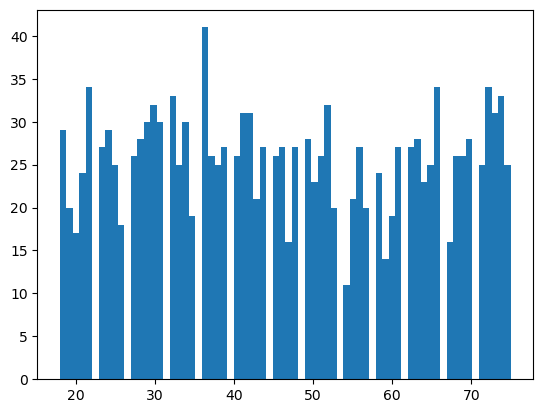

In [449]:
unique_customers = merged_data.drop_duplicates(subset=['Person ID'])
x=unique_customers['Age']
plt.hist(x,bins=70)

C:\Users\namle\AppData\Local\Temp\ipykernel_26368\3671432895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_customers['Age Group'] = pd.cut(unique_customers['Age'], bins=[18, 30, 60, float('inf')], labels=['Thiếu niên', 'Trung niên', 'Cao tuổi'], right=False)


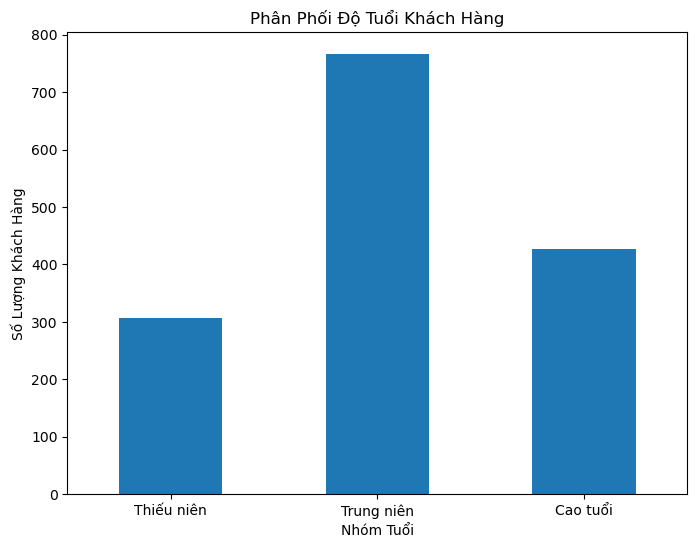

In [450]:
unique_customers = merged_data.drop_duplicates(subset=['Person ID'])
unique_customers['Age Group'] = pd.cut(unique_customers['Age'], bins=[18, 30, 60, float('inf')], labels=['Thiếu niên', 'Trung niên', 'Cao tuổi'], right=False)
age_group_counts = unique_customers['Age Group'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar')
plt.title('Phân Phối Độ Tuổi Khách Hàng')
plt.xlabel('Nhóm Tuổi')
plt.ylabel('Số Lượng Khách Hàng')
plt.xticks(rotation=0)
plt.show()

Lượng khách đến trong các ngày trong tuần 

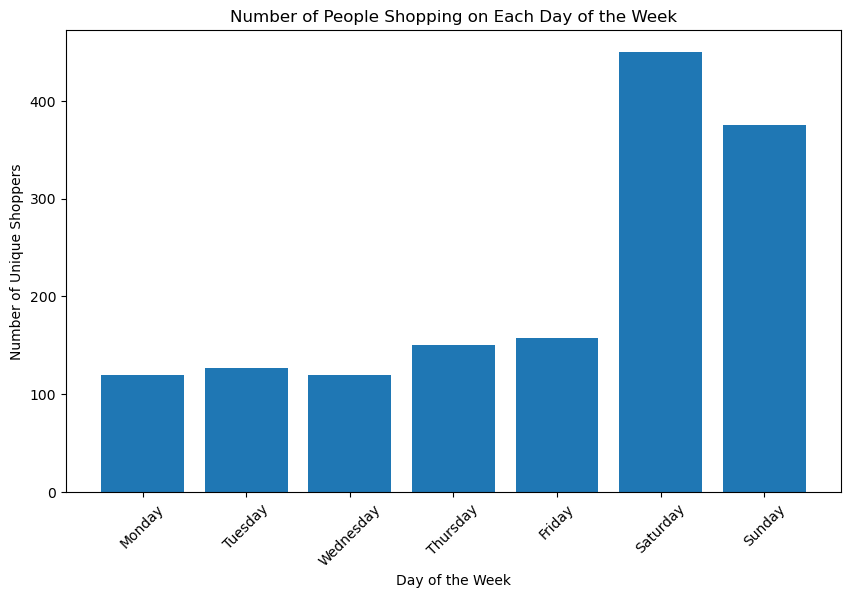

In [454]:
dfplt=merged_data.copy()
dfplt['Datetime'] = pd.to_datetime(dfplt['Timestamp'], unit='s')

# Extract the day of the week from the datetime
dfplt['DayOfWeek'] = dfplt['Datetime'].dt.day_name()

# Group by 'DayOfWeek' and count unique 'Person ID'
shopping_counts = dfplt.groupby('DayOfWeek')['Person ID'].nunique()

# Reorder the days of the week to ensure correct order in the chart
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
shopping_counts = shopping_counts.reindex(ordered_days)

# Plot the number of people shopping on each day of the week
plt.figure(figsize=(10, 6))
plt.bar(shopping_counts.index, shopping_counts.values)
plt.title('Number of People Shopping on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unique Shoppers')
plt.xticks(rotation=45)
plt.show()

$Đáp$ $án$ $câu$ $1:$

Thống kê 5 mặt hàng có tổng thời gian nhìn và cầm xem lâu nhất?

In [457]:
item_stats = merged_data.groupby('Name').agg(
    total_looking_time=('Looking at item (s)', 'sum'),
    total_holding_time=('Holding the item (s)', 'sum')
)

item_stats['total_interaction_time'] = item_stats['total_looking_time'] + item_stats['total_holding_time']

top_5_items = item_stats.sort_values(by='total_interaction_time', ascending=False).head(5)

top_5_items

,total_looking_time,total_holding_time,total_interaction_time
Name,,,
Sữa chua uống Probi,11503,11393,22896
Sữa chua uống Yakult,11454,11442,22896
Sữa ông thọ,7712,6227,13939
Bim bim Oishi,7415,6451,13866
Snack khoai tây Lays,7051,6311,13362


$Đáp$ $án$ $câu$ $2:$

Thống kê 5 mặt hàng thường được cầm lên rồi trả lại nhiều nhất?

In [460]:
picked_and_returned =merged_data[(merged_data['Picking up item'] == True) & (merged_data['Returning item'] == True)]
item_return_counts = picked_and_returned['Name'].value_counts().head(5)

item_return_counts


Name
4 hộp sữa lúa mạch Milo 180ml    134
Snack khoai tây Lays             127
Mý ý SG Food                     117
Nước lẩu Barona                  116
Sữa chua Vinamik                 114
Name: count, dtype: int64

Nhận thấy miss value ở 3 cột cuối: Putting item into bag,Taking item out of bag ,Putting item into bag in the 2nd time

Đây là chuỗi hành động logic ta sẽ xử lí các missvalue theo xác xuất

Bước đầu xử lí xác xuất của hành động Putting item into bag (Put1) khi biết trước tên sản phẩm và các hành động trước đó 


In [463]:
df=merged_data.copy()
product_name_column = 'Name' if 'Name' in data_item.columns else None

if product_name_column:
    product_names = data_item[product_name_column].unique()
    product_names_list = product_names.tolist()
else:
    product_names_list = ["Cột tên sản phẩm không tìm thấy"]

product_names_list

['Bánh Oreo',
 'Bánh Chocopie',
 'Kẹo cao su Cool Air Fresh',
 'Bánh mỳ chà bông Kinh đô',
 'Bánh trứng Custard',
 'Hạt hướng dương Chacheer',
 'Bim bim Oishi',
 'Snack khoai tây Lays',
 'Bánh gạo Richi',
 'Socola trứng Kinder',
 'Kẹo dẻo Alphelibe',
 'Thạch rau câu Đức Hạnh',
 'Kẹo Haribo charshmallows',
 'Dầu gội XMen',
 'Dầu gội Romano',
 'Dầu gội Dove',
 'Dầu gội Sunsilk',
 'Sửa rửa mặt Oxy',
 'Sửa rửa mặt Hada Labo',
 'Sửa rửa mặt Simple',
 'Dao cạo râu Gillet',
 'Tăm bông ngoáy tai Famapro',
 'Bàn chải Colgate',
 'Khăn tắm Shine',
 'Khăn mặt Shine',
 'Bông tẩy trang Kokimi',
 'Tã dán Merries size NB 76 miếng (dưới 5kg)',
 'Tã dán sơ sinh Bobby siêu mỏng Newborn 70 miếng (cho bé dưới 5kg)',
 'Tã dán sơ sinh Goo.n Premium Newborn 70 miếng',
 'Băng ban ngày Diana ',
 'Băng ban đêm Diana Super Night',
 'Lốc 4 hộp sữa tươi Vinamilk 100% ít đường',
 'Lốc 4 hộp sữa tươi ít đường TH true MILK',
 '4 hộp sữa lúa mạch Milo 180ml',
 'Sữa bột Ensure Gold lúa mạch',
 'Sửa bột Anele',
 'Sữa 

In [465]:
result = []

# Lặp qua từng tên sản phẩm
for product_name in product_names_list:
    product_data = df[df['Name'] == product_name].dropna(subset=['Putting item into bag'])
    for holding_bag in [True, False]:
        for picking_up_item in [True, False]:
            for returning_item in [True, False]:
                # Lọc theo các điều kiện hành động
                filtered_data = product_data[
                    (product_data['Holding the bag'] == holding_bag) &
                    (product_data['Picking up item'] == picking_up_item) &
                    (product_data['Returning item'] == returning_item)
                ]
                
                # Tính xác suất True/False của "Putting item into bag"
                total_count = len(filtered_data)
                if total_count > 0:
                    prob_true = len(filtered_data[filtered_data['Putting item into bag'] == True]) / total_count
                    prob_false = len(filtered_data[filtered_data['Putting item into bag'] == False]) / total_count
                else:
                    prob_true = prob_false = 0
                
                # Lưu kết quả
                result.append({
                    'Product Name': product_name,
                    'Holding the bag': holding_bag,
                    'Picking up item': picking_up_item,
                    'Returning item': returning_item,
                    'P(Putting item into bag = True)': prob_true,
                    'P(Putting item into bag = False)': prob_false
                })

# Tạo DataFrame từ kết quả
result_df = pd.DataFrame(result)
result_df

,Product Name,Holding the bag,Picking up item,Returning item,P(Putting item into bag = True),P(Putting item into bag = False)
0,Bánh Oreo,True,True,True,0.445946,0.554054
1,Bánh Oreo,True,True,False,0.456522,0.543478
2,Bánh Oreo,True,False,True,0.000000,0.000000
3,Bánh Oreo,True,False,False,0.000000,0.000000
4,Bánh Oreo,False,True,True,0.285714,0.714286
...,...,...,...,...,...,...
1067,Xúc xích CP,True,False,False,0.000000,0.000000
1068,Xúc xích CP,False,True,True,0.875000,0.125000
1069,Xúc xích CP,False,True,False,0.333333,0.666667
1070,Xúc xích CP,False,False,True,0.000000,0.000000


Điền miss value cho cột Putting item into bag

In [468]:
filled_data=df.copy()
probability_df=result_df.copy()
for index, row in filled_data[filled_data['Putting item into bag'].isna()].iterrows():
    # Lọc bảng xác suất để tìm xác suất tương ứng
    prob_row = probability_df[
        (probability_df['Product Name'] == row['Name']) &
        (probability_df['Holding the bag'] == row['Holding the bag']) &
        (probability_df['Picking up item'] == row['Picking up item']) &
        (probability_df['Returning item'] == row['Returning item'])
    ]

    if not prob_row.empty:
        prob_true = prob_row['P(Putting item into bag = True)'].values[0]
        prob_false = prob_row['P(Putting item into bag = False)'].values[0]

        # Điền giá trị dựa trên xác suất
        filled_data.at[index, 'Putting item into bag'] = True if prob_true > prob_false else False

# Kết quả sau khi điền missing values
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shelf ID                               15394 non-null  int64  
 1   Person ID                              15394 non-null  int64  
 2   Timestamp                              15394 non-null  int64  
 3   Age                                    15394 non-null  int64  
 4   Gender                                 15394 non-null  object 
 5   Height                                 15394 non-null  int64  
 6   Weight                                 15394 non-null  int64  
 7   Married status                         15394 non-null  object 
 8   Moving speed (m/s)                     15394 non-null  float64
 9   Item ID                                15394 non-null  int64  
 10  Looking at item (s)                    15394 non-null  int64  
 11  Ho

Tiếp tục xử lí miss value ở cột Taking item out of bag

Xác xuất của hành động Taking item out of bag với Từng sản phẩm và những hành động trước đó 

In [471]:
# Tạo bảng xác suất tỷ lệ cho "Taking item out of bag" dựa trên tên sản phẩm
# Đã kết hợp dữ liệu từ hai bảng dựa trên "Item ID" và loại bỏ các giá trị thiếu trong cột "Taking item out of bag"
filtered_merged_data = filled_data.dropna(subset=['Taking item out of bag'])

# Tạo bảng kết quả để lưu trữ xác suất cho từng sản phẩm
probability_table = []

# Lặp qua từng tên sản phẩm
for product_name in product_names_list:
    product_data = filled_data[filled_data['Name'] == product_name].dropna(subset=['Taking item out of bag'])
    for holding_bag in [True, False]:
        for picking_up_item in [True, False]:
            for returning_item in [True, False]:
                for put1_item_bag in [True, False]:
                # Lọc theo các điều kiện hành động
                    filtered_data = product_data[
                        (product_data['Holding the bag'] == holding_bag) &
                        (product_data['Picking up item'] == picking_up_item) &
                        (product_data['Returning item'] == returning_item)&
                        (product_data['Putting item into bag']==put1_item_bag)
                    ]
                    
                    # Tính xác suất True/False của "Putting item into bag"
                    total_count = len(filtered_data)
                    if total_count > 0:
                        prob_true = len(filtered_data[filtered_data['Taking item out of bag'] == True]) / total_count
                        prob_false = len(filtered_data[filtered_data['Taking item out of bag'] == False]) / total_count
                    else:
                        prob_true = prob_false = 0
                    
                    # Lưu kết quả
                    probability_table.append({
                        'Product Name': product_name,
                        'Holding the bag': holding_bag,
                        'Picking up item': picking_up_item,
                        'Returning item': returning_item,
                        'Put1_item':put1_item_bag,
                        'P(Taking item out of bag = True)': prob_true,
                        'P(Taking item out of bag = False)': prob_false
                    })
probability_table=pd.DataFrame(probability_table)
probability_table

,Product Name,Holding the bag,Picking up item,Returning item,Put1_item,P(Taking item out of bag = True),P(Taking item out of bag = False)
0,Bánh Oreo,True,True,True,True,0.461538,0.538462
1,Bánh Oreo,True,True,True,False,0.488889,0.511111
2,Bánh Oreo,True,True,False,True,0.452381,0.547619
3,Bánh Oreo,True,True,False,False,0.428571,0.571429
4,Bánh Oreo,True,False,True,True,0.000000,0.000000
...,...,...,...,...,...,...,...
2139,Xúc xích CP,False,True,False,False,1.000000,0.000000
2140,Xúc xích CP,False,False,True,True,0.000000,0.000000
2141,Xúc xích CP,False,False,True,False,0.000000,0.000000
2142,Xúc xích CP,False,False,False,True,0.000000,0.000000


Điền các giá trị missvalue cho cột Taking item out of bag

In [473]:
probability_1=probability_table.copy()
for index, row in filled_data[filled_data['Taking item out of bag'].isna()].iterrows():
    # Lọc bảng xác suất để tìm xác suất tương ứng
    prob_row = probability_1[
        (probability_1['Product Name'] == row['Name']) &
        (probability_1['Holding the bag'] == row['Holding the bag']) &
        (probability_1['Picking up item'] == row['Picking up item']) &
        (probability_1['Returning item'] == row['Returning item'])&
        (probability_1['Put1_item']==row['Putting item into bag'])
        
    ]

    if not prob_row.empty:
        prob_true = prob_row['P(Taking item out of bag = True)'].values[0]
        prob_false = prob_row['P(Taking item out of bag = False)'].values[0]

        filled_data.at[index, 'Taking item out of bag'] = True if prob_true > prob_false else False

# Kết quả sau khi điền missing values
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shelf ID                               15394 non-null  int64  
 1   Person ID                              15394 non-null  int64  
 2   Timestamp                              15394 non-null  int64  
 3   Age                                    15394 non-null  int64  
 4   Gender                                 15394 non-null  object 
 5   Height                                 15394 non-null  int64  
 6   Weight                                 15394 non-null  int64  
 7   Married status                         15394 non-null  object 
 8   Moving speed (m/s)                     15394 non-null  float64
 9   Item ID                                15394 non-null  int64  
 10  Looking at item (s)                    15394 non-null  int64  
 11  Ho

Tiếp tục xử lí miss value ở cột Putting item into bag in the 2nd time

Xác xuất của hành động Putting item into bag in the 2nd time với Từng sản phẩm và những hành động trước đó 

In [475]:
filtered_merged_data = filled_data.dropna(subset=['Putting item into bag in the 2nd time'])


probability_table = []

for product_name in product_names_list:
    product_data = filled_data[filled_data['Name'] == product_name].dropna(subset=['Putting item into bag in the 2nd time'])
    for holding_bag in [True, False]:
        for picking_up_item in [True, False]:
            for returning_item in [True, False]:
                for put1_item_bag in [True, False]:
                    for taking_out_bag in [True, False]:
                # Lọc theo các điều kiện hành động
                        filtered_data = product_data[
                            (product_data['Holding the bag'] == holding_bag) &
                            (product_data['Picking up item'] == picking_up_item) &
                            (product_data['Returning item'] == returning_item)&
                            (product_data['Putting item into bag']==put1_item_bag)&
                             (product_data['Taking item out of bag']==taking_out_bag)
                        ]
                        
                        # Tính xác suất True/False của "Putting item into bag"
                        total_count = len(filtered_data)
                        if total_count > 0:
                            prob_true = len(filtered_data[filtered_data['Putting item into bag in the 2nd time'] == True]) / total_count
                            prob_false = len(filtered_data[filtered_data['Putting item into bag in the 2nd time'] == False]) / total_count
                        else:
                            prob_true = prob_false = 0
                        
                        # Lưu kết quả
                        probability_table.append({
                            'Product Name': product_name,
                            'Holding the bag': holding_bag,
                            'Picking up item': picking_up_item,
                            'Returning item': returning_item,
                            'Put1_item':put1_item_bag,
                            'Taking item out of bag':taking_out_bag,
                            'P(Putting item into bag in the 2nd time = True)': prob_true,
                            'P(Putting item into bag in the 2nd time = False)': prob_false
                        })
probability_table=pd.DataFrame(probability_table)
probability_table

,Product Name,Holding the bag,Picking up item,Returning item,Put1_item,Taking item out of bag,P(Putting item into bag in the 2nd time = True),P(Putting item into bag in the 2nd time = False)
0,Bánh Oreo,True,True,True,True,True,0.555556,0.444444
1,Bánh Oreo,True,True,True,True,False,0.666667,0.333333
2,Bánh Oreo,True,True,True,False,True,0.357143,0.642857
3,Bánh Oreo,True,True,True,False,False,0.586207,0.413793
4,Bánh Oreo,True,True,False,True,True,0.684211,0.315789
...,...,...,...,...,...,...,...,...
4283,Xúc xích CP,False,False,True,False,False,0.000000,0.000000
4284,Xúc xích CP,False,False,False,True,True,0.000000,0.000000
4285,Xúc xích CP,False,False,False,True,False,0.000000,0.000000
4286,Xúc xích CP,False,False,False,False,True,0.000000,0.000000


Điền giá trị miss

In [477]:
probability_1=probability_table.copy()
for index, row in filled_data[filled_data['Putting item into bag in the 2nd time'].isna()].iterrows():
    # Lọc bảng xác suất để tìm xác suất tương ứng
    prob_row = probability_1[
        (probability_1['Product Name'] == row['Name']) &
        (probability_1['Holding the bag'] == row['Holding the bag']) &
        (probability_1['Picking up item'] == row['Picking up item']) &
        (probability_1['Returning item'] == row['Returning item'])&
        (probability_1['Put1_item']==row['Putting item into bag'])&
        (probability_1['Taking item out of bag']==row['Taking item out of bag'])
        
    ]

    if not prob_row.empty:
        prob_true = prob_row['P(Putting item into bag in the 2nd time = True)'].values[0]
        prob_false = prob_row['P(Putting item into bag in the 2nd time = False)'].values[0]

        filled_data.at[index, 'Putting item into bag in the 2nd time'] = True if prob_true > prob_false else False

# Kết quả sau khi điền missing values
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shelf ID                               15394 non-null  int64  
 1   Person ID                              15394 non-null  int64  
 2   Timestamp                              15394 non-null  int64  
 3   Age                                    15394 non-null  int64  
 4   Gender                                 15394 non-null  object 
 5   Height                                 15394 non-null  int64  
 6   Weight                                 15394 non-null  int64  
 7   Married status                         15394 non-null  object 
 8   Moving speed (m/s)                     15394 non-null  float64
 9   Item ID                                15394 non-null  int64  
 10  Looking at item (s)                    15394 non-null  int64  
 11  Ho

Một quy trình mua hàng được xác định logic :   Returning item= False or Put1 = True and Take_Out= True and Put2=True 

Hoặc Put1 = True and Take_Out= False and Put2=?

Hoặc Put2 = True


$Đáp$ $án$ $câu$ $3:$


Các nhóm khách hàng theo độ tuổi (Thiếu niên: 18 - 30; Trung niên: 31 - 60; Cao
tuổi: > 60) mua mặt hàng nào nhiều nhất?

In [480]:
data=filled_data.copy()
data['Age Group'] = pd.cut(data['Age'], bins=[18, 30, 60, float('inf')], labels=['Thiếu niên', 'Trung niên', 'Cao tuổi'], right=False)
purchased_data = data[
    (((data['Returning item']==False) & (data['Picking up item']==True)) | 
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==True) & (data['Putting item into bag in the 2nd time']==True)) |
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==False))|
    (data['Putting item into bag in the 2nd time']==True))
]
age_group_purchases = purchased_data.groupby(['Age Group', 'Name']).size().reset_index(name='Purchase Count')
most_purchased_items_by_age_group = age_group_purchases.loc[age_group_purchases.groupby('Age Group')['Purchase Count'].idxmax()]
print("Mặt hàng được mua nhiều nhất:")
print(most_purchased_items_by_age_group)


Mặt hàng được mua nhiều nhất:
      Age Group                Name  Purchase Count
10   Thiếu niên  Bánh trứng Custard              53
170  Trung niên      Kem tràng tiền             111
278    Cao tuổi  Bánh trứng Custard              65


C:\Users\namle\AppData\Local\Temp\ipykernel_26368\2544609209.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchases = purchased_data.groupby(['Age Group', 'Name']).size().reset_index(name='Purchase Count')
C:\Users\namle\AppData\Local\Temp\ipykernel_26368\2544609209.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_purchased_items_by_age_group = age_group_purchases.loc[age_group_purchases.groupby('Age Group')['Purchase Count'].idxmax()]


$Đáp$ $án$ $câu$ $4:$

Ngày nào trong tuần có doanh thu cao nhất?

In [482]:
customer_behavior_data=data.copy()
customer_behavior_data['Datetime'] = pd.to_datetime(customer_behavior_data['Timestamp'], unit='s')
customer_behavior_data['Day of Week'] = customer_behavior_data['Datetime'].dt.day_name()

purchased_items_with_day = customer_behavior_data[
    (((data['Returning item']==False) & (data['Picking up item']==True)) | 
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==True) & (data['Putting item into bag in the 2nd time']==True)) |
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==False))|
    (data['Putting item into bag in the 2nd time']==True))
]
purchased_items_with_day



,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate,Age Group,Datetime,Day of Week
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,350.0,"28,500 ₫",2023-08-26,2023-12-30,False,10,3,Trung niên,2024-07-06 10:00:00,Saturday
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,1000.0,"64,500 ₫",2023-08-23,2024-05-06,False,5,4,Trung niên,2024-07-06 10:02:00,Saturday
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,1000.0,"47,000 ₫",2024-04-09,2024-08-20,False,0,3,Trung niên,2024-07-06 10:08:00,Saturday
5,4,1,1720260720,52,Female,162,41,Married,1.26,5,...,1000.0,"64,500 ₫",2023-08-23,2024-05-06,False,5,4,Trung niên,2024-07-06 10:12:00,Saturday
6,7,2,1720260720,55,Female,150,54,Single,1.26,11,...,140.0,"33,000 ₫",2024-04-16,2024-06-10,False,0,4,Trung niên,2024-07-06 10:12:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,...,800.0,"410,000 ₫",2024-01-29,2024-08-13,False,10,5,Trung niên,2024-07-05 03:49:00,Friday
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,...,75.0,"4,400 ₫",2023-12-18,2024-02-16,False,0,5,Trung niên,2024-07-05 03:54:00,Friday
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,...,750.0,"104,000 ₫",2023-11-16,2024-09-04,False,10,3,Trung niên,2024-07-05 03:56:00,Friday
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,...,500.0,"67,500 ₫",2024-08-05,2025-06-16,False,0,5,Trung niên,2024-07-05 03:58:00,Friday


In [484]:
purchased_items_with_day['Price'] = purchased_items_with_day['Price'].str.replace('₫', '').str.replace(',', '').astype(float)
purchased_items_with_day

C:\Users\namle\AppData\Local\Temp\ipykernel_26368\867112900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased_items_with_day['Price'] = purchased_items_with_day['Price'].str.replace('₫', '').str.replace(',', '').astype(float)


,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate,Age Group,Datetime,Day of Week
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,350.0,28500.0,2023-08-26,2023-12-30,False,10,3,Trung niên,2024-07-06 10:00:00,Saturday
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,1000.0,64500.0,2023-08-23,2024-05-06,False,5,4,Trung niên,2024-07-06 10:02:00,Saturday
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,1000.0,47000.0,2024-04-09,2024-08-20,False,0,3,Trung niên,2024-07-06 10:08:00,Saturday
5,4,1,1720260720,52,Female,162,41,Married,1.26,5,...,1000.0,64500.0,2023-08-23,2024-05-06,False,5,4,Trung niên,2024-07-06 10:12:00,Saturday
6,7,2,1720260720,55,Female,150,54,Single,1.26,11,...,140.0,33000.0,2024-04-16,2024-06-10,False,0,4,Trung niên,2024-07-06 10:12:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,...,800.0,410000.0,2024-01-29,2024-08-13,False,10,5,Trung niên,2024-07-05 03:49:00,Friday
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,...,75.0,4400.0,2023-12-18,2024-02-16,False,0,5,Trung niên,2024-07-05 03:54:00,Friday
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,...,750.0,104000.0,2023-11-16,2024-09-04,False,10,3,Trung niên,2024-07-05 03:56:00,Friday
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,...,500.0,67500.0,2024-08-05,2025-06-16,False,0,5,Trung niên,2024-07-05 03:58:00,Friday


In [486]:
revenue_by_day = purchased_items_with_day.groupby('Day of Week')['Price'].sum().reset_index(name='Total Revenue')
revenue_by_day

,Day of Week,Total Revenue
0,Friday,125351200.0
1,Monday,93469300.0
2,Saturday,444019100.0
3,Sunday,403845800.0
4,Thursday,142461700.0
5,Tuesday,130839600.0
6,Wednesday,94666800.0


Vậy ngày có doanh thu lớn nhất là Saturday (thứ 7)

$Đáp$ $án$ $câu$ $5:$

Trong 3 nhóm tuổi sau: Thiếu niên (18 - 30), Trung niên (31 - 60), Cao tuổi: (> 60),
nhóm tuổi nào có số người đi siêu thị nhiều nhất?

In [488]:
age_group_count = data.groupby('Age Group')['Person ID'].nunique().reset_index(name='Number of People')


age_group_count_sorted = age_group_count.sort_values(by='Number of People', ascending=False)

age_group_count_sorted 

C:\Users\namle\AppData\Local\Temp\ipykernel_26368\2749951975.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_count = data.groupby('Age Group')['Person ID'].nunique().reset_index(name='Number of People')


,Age Group,Number of People
1,Trung niên,766
2,Cao tuổi,427
0,Thiếu niên,307


Đáp án Trung Niên

$Đáp$ $án$ $câu$ $6:$

Top 5 các mặt hàng giảm giá được người dùng mua nhiều nhất?

In [490]:
df5=data.copy()
purchased1 = data[
    ((((data['Returning item']==False) & (data['Picking up item']==True)) | 
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==True) & (data['Putting item into bag in the 2nd time']==True)) |
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==False))|
    (data['Putting item into bag in the 2nd time']==True)) & (data['Discount ']>0))
]
purchased1['Name'].value_counts().head(5)

Name
Bánh trứng Custard      214
Sữa bột Milo            214
Bim bim Oishi           204
Kem tràng tiền          200
Snack khoai tây Lays    186
Name: count, dtype: int64

$Đáp$ $án$ $câu$ $7:$

Top 5 các mặt hàng được chạy quảng cáo được người dùng mua nhiều nhất?


In [492]:

purchased2 = data[
    ((((data['Returning item']==False) & (data['Picking up item']==True)) | 
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==True) & (data['Putting item into bag in the 2nd time']==True)) |
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==False))|
    (data['Putting item into bag in the 2nd time']==True)) & (data['Marketing strategy']==True))
]

purchased2['Name'].value_counts().head(5)

Name
Sữa bột Milo          214
Bánh trứng Custard    214
Kem tràng tiền        200
Khăn mặt Shine        131
Khăn tắm Shine        114
Name: count, dtype: int64

$Đáp$ $án$ $câu$ $8:$

Top 3 quầy hàng có thời lượng trung bình quan tâm đến sản phẩm, trên số lượt tương
tác, là lâu nhất (quan tâm tương ứng với việc nhìn và cầm xem)?

In [494]:

customer_behavior_data['Interaction Time'] = customer_behavior_data['Looking at item (s)'] + customer_behavior_data['Holding the item (s)']

average_interaction_time_by_shelf = customer_behavior_data.groupby('Shelf ID').agg(
    Total_Interaction_Time=('Interaction Time', 'sum'),
    Total_Interactions=('Interaction Time', 'count')
).reset_index()


average_interaction_time_by_shelf['Average Interaction Time'] = average_interaction_time_by_shelf['Total_Interaction_Time'] / average_interaction_time_by_shelf['Total_Interactions']

average_interaction_time_by_shelf.sort_values(by='Average Interaction Time', ascending=False).head(3)

,Shelf ID,Total_Interaction_Time,Total_Interactions,Average Interaction Time
5,5,47380,761,62.260184
7,7,201638,3305,61.009985
3,3,77919,1302,59.845622


$Đáp$ $án$ $câu$ $9:$

Top 3 quầy hàng có số sản phẩm được mua nhiều nhất?

In [496]:
purchased_data = data[
    (((data['Returning item']==False) & (data['Picking up item']==True)) | 
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==True) & (data['Putting item into bag in the 2nd time']==True)) |
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==False))|
    (data['Putting item into bag in the 2nd time']==True))
]
purchased_data['Shelf ID'].value_counts().head(3)

Shelf ID
7    2654
0    2288
1    1996
Name: count, dtype: int64

In [498]:
purchased_data = data[
    (((data['Returning item']==False) & (data['Picking up item']==True)) | 
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==True) & (data['Putting item into bag in the 2nd time']==True)) |
    ((data['Putting item into bag']==True) & (data['Taking item out of bag']==False))|
    (data['Putting item into bag in the 2nd time']==True))
]
purchased_data

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate,Age Group
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,Vietnam,Trung bình,350.0,"28,500 ₫",2023-08-26,2023-12-30,False,10,3,Trung niên
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,Vietnam,Cao,1000.0,"64,500 ₫",2023-08-23,2024-05-06,False,5,4,Trung niên
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,Vietnam,Cao,1000.0,"47,000 ₫",2024-04-09,2024-08-20,False,0,3,Trung niên
5,4,1,1720260720,52,Female,162,41,Married,1.26,5,...,Vietnam,Cao,1000.0,"64,500 ₫",2023-08-23,2024-05-06,False,5,4,Trung niên
6,7,2,1720260720,55,Female,150,54,Single,1.26,11,...,Vietnam,Thấp,140.0,"33,000 ₫",2024-04-16,2024-06-10,False,0,4,Trung niên
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,...,New Zealand,Thấp,800.0,"410,000 ₫",2024-01-29,2024-08-13,False,10,5,Trung niên
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,...,Vietnam,Trung bình,75.0,"4,400 ₫",2023-12-18,2024-02-16,False,0,5,Trung niên
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,...,Vietnam,Trung bình,750.0,"104,000 ₫",2023-11-16,2024-09-04,False,10,3,Trung niên
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,...,Vietnam,Cao,500.0,"67,500 ₫",2024-08-05,2025-06-16,False,0,5,Trung niên


$Đáp$ $án$ $câu$ $10:$

Người dùng có thói quen di chuyển giữa 2 quầy hàng nào nhiều nhất?

In [500]:
from collections import defaultdict
transition_counts = defaultdict(int)
for person_id, group in customer_behavior_data.groupby('Person ID'):

    shelves_visited = group['Shelf ID'].tolist()
    for i in range(len(shelves_visited) - 1):
        src = shelves_visited[i]
        dest = shelves_visited[i + 1]
        transition_counts[(src, dest)] += 1
transition_df = pd.DataFrame(list(transition_counts.items()), columns=['Transition', 'Count'])
filtered_transitions = {k: v for k, v in transition_counts.items() if k[0] != k[1]}
filtered_transition_df = pd.DataFrame(list(filtered_transitions.items()), columns=['Transition', 'Count'])

filtered_transition_df.sort_values(by='Count',ascending=False).head(5)

,Transition,Count
22,"(7, 0)",123
6,"(0, 7)",109
18,"(1, 7)",104
7,"(7, 1)",92
9,"(7, 4)",92


Đáp án là di chuyển giữa quầy 7 và quầy 0 là nhiều nhất

In [502]:
data_shelf=pd.read_csv("03_Shelf_Information_Data.csv")
data_shelf

,Shelf ID,Description,Location_x (center),Location_y (center),Width,Height,Length,Number of items,Shape
0,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn
1,1,Quầy hoá mỹ phẩm,350,500,100,180,400,18,Kệ hàng
2,2,Quầy sữa,600,400,100,180,600,9,Kệ hàng
3,3,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng
4,4,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng
5,5,Quầy gia dụng,350,950,700,180,100,16,Kệ hàng
6,6,Quầy sách và đồ chơi,50,400,100,180,600,16,Kệ hàng
7,7,Quầy đông lạnh,1150,950,700,180,100,16,Kệ hàng


In [504]:
merged_data

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,Dầu hào Maggi,Vietnam,Trung bình,350.0,"28,500 ₫",2023-08-26,2023-12-30,False,10,3
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,Dầu ăn Tường An,Vietnam,Cao,1000.0,"64,500 ₫",2023-08-23,2024-05-06,False,5,4
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,...,Dầu ăn Simply,Vietnam,Cao,1000.0,"79,000 ₫",2024-07-18,2025-06-29,False,10,5
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,...,Mỳ chính Miwon,Hàn Quốc,Thấp,454.0,"34,000 ₫",2023-09-14,2024-07-13,False,5,3
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,Dầu ăn Meizan,Vietnam,Cao,1000.0,"47,000 ₫",2024-04-09,2024-08-20,False,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,...,Sửa bột Anele,New Zealand,Thấp,800.0,"410,000 ₫",2024-01-29,2024-08-13,False,10,5
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,...,Mỳ Hảo Hảo,Vietnam,Trung bình,75.0,"4,400 ₫",2023-12-18,2024-02-16,False,0,5
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,...,Vang đỏ đà lạt,Vietnam,Trung bình,750.0,"104,000 ₫",2023-11-16,2024-09-04,False,10,3
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,...,Ngũ cốc VinaCafe,Vietnam,Cao,500.0,"67,500 ₫",2024-08-05,2025-06-16,False,0,5


In [506]:
total_data=pd.merge(data_shelf, merged_data,on=['Shelf ID'], how='left')
total_data

,Shelf ID,Description,Location_x (center),Location_y (center),Width,Height_x,Length,Number of items,Shape,Person ID,...,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn,2,...,Socola trứng Kinder,Ý,Thấp,20.0,"28,500 ₫",2023-11-01,2024-11-30,False,10,4
1,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn,2,...,Kẹo dẻo Alphelibe,Vietnam,Thấp,73.5,"15,300 ₫",2023-08-22,2024-08-22,False,15,3
2,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn,2,...,Kẹo Haribo charshmallows,Vietnam,Thấp,70.0,"28,500 ₫",2023-10-30,2024-07-06,False,0,3
3,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn,2,...,Bim bim Oishi,Vietnam,Trung bình,70.0,"12,000 ₫",2024-06-25,2025-05-08,False,5,5
4,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn,2,...,Hạt hướng dương Chacheer,Vietnam,Trung bình,130.0,"25,000 ₫",2024-08-05,2024-11-24,False,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,7,Quầy đông lạnh,1150,950,700,180,100,16,Kệ hàng,1498,...,Viên thả lẩu cầu tre,Vietnam,Thấp,300.0,"54,000 ₫",2024-06-14,2024-07-17,False,0,5
15390,7,Quầy đông lạnh,1150,950,700,180,100,16,Kệ hàng,1499,...,Sữa chua uống Probi,Vietnam,Trung bình,130.0,"36,000 ₫",2024-02-16,2024-08-28,False,5,5
15391,7,Quầy đông lạnh,1150,950,700,180,100,16,Kệ hàng,1499,...,Sữa chua Mộc Châu,Vietnam,Trung bình,100.0,"25,000 ₫",2024-07-10,2025-01-28,False,0,3
15392,7,Quầy đông lạnh,1150,950,700,180,100,16,Kệ hàng,1499,...,Sữa chua uống Yakult,Vietnam,Trung bình,65.0,"26,000 ₫",2024-03-26,2024-09-18,False,0,3


In [508]:
total_data.to_csv('total_data.csv', index=False)

Đáp án câu 11

In [510]:
total_data['Name'].value_counts()

Name
Snack khoai tây Lays             235
4 hộp sữa lúa mạch Milo 180ml    233
Bim bim Oishi                    233
Sữa ông thọ                      232
Bánh trứng Custard               230
                                ... 
Chảo Sunhouse                     41
Nồi cơm điện Cuckcoo              40
Máy xay sinh tố Comet             39
Sách Ðạo Tình                     36
Bếp nướng Lock&Lock               36
Name: count, Length: 134, dtype: int64

In [512]:
purchased_data['Shelf ID'].value_counts()

Shelf ID
7    2654
0    2288
1    1996
2    1613
4    1592
3    1068
6     844
5     665
Name: count, dtype: int64

In [516]:
product_view_count_new = total_data.groupby('Name')['Person ID'].count().reset_index(name='Count')

# Sắp xếp sản phẩm theo số lượt xem giảm dần
product_view_count_new_sorted = product_view_count_new.sort_values(by='Count', ascending=False)

product_view_count_new_sorted

,Name,Count
77,Snack khoai tây Lays,235
0,4 hộp sữa lúa mạch Milo 180ml,233
4,Bim bim Oishi,233
110,Sữa ông thọ,232
10,Bánh trứng Custard,230
...,...,...
21,Chảo Sunhouse,41
67,Nồi cơm điện Cuckcoo,40
48,Máy xay sinh tố Comet,39
93,Sách Ðạo Tình,36


In [520]:

product_details = total_data[['Name', 'Location', 'Description', 'Shelf ID']]


product_view_with_details = pd.merge(product_view_count_new_sorted, product_details.drop_duplicates(), on='Name', how='left')


product_view_with_details_sorted = product_view_with_details.sort_values(by='Count')

product_view_with_details_sorted


,Name,Count,Location,Description,Shelf ID
133,Bếp nướng Lock&Lock,36,Cao,Quầy gia dụng,5
132,Sách Ðạo Tình,36,Trung bình,Quầy sách và đồ chơi,6
131,Máy xay sinh tố Comet,39,Trung bình,Quầy gia dụng,5
130,Nồi cơm điện Cuckcoo,40,Cao,Quầy gia dụng,5
128,Vang đỏ đà lạt,41,Trung bình,Quầy thực phẩm,3
...,...,...,...,...,...
4,Bánh trứng Custard,230,Trung bình,Quầy bánh kẹo,0
3,Sữa ông thọ,232,Thấp,Quầy sữa,2
2,Bim bim Oishi,233,Trung bình,Quầy bánh kẹo,0
1,4 hộp sữa lúa mạch Milo 180ml,233,Trung bình,Quầy sữa,2


Có thể thầy sản phẩm ở 2 Shelf ID 5,6 đang có ít người di chuyển và xem mặt hàng

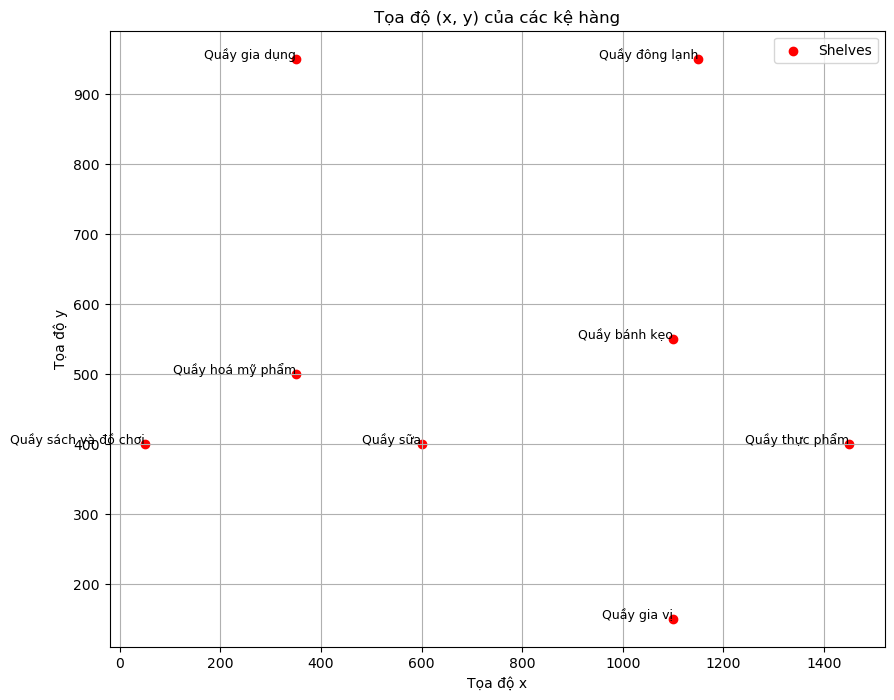

In [525]:

plt.figure(figsize=(10, 8))

plt.scatter(data_shelf['Location_x (center)'], data_shelf['Location_y (center)'], c='red', label='Shelves')

for i in range(len(data_shelf)):
    plt.text(data_shelf['Location_x (center)'][i], data_shelf['Location_y (center)'][i], 
             data_shelf['Description'][i], fontsize=9, ha='right')

# Cài đặt tiêu đề và nhãn trục
plt.title('Tọa độ (x, y) của các kệ hàng')
plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.grid(True)
plt.legend()
plt.show()

Dựa trên phân tích hiện tại, sắp xếp các quầy hàng trong siêu thị chưa hợp lý đối với bốn quầy: Quầy gia vị, Quầy thực phẩm, Quầy đông lạnh, và Quầy gia dụng. Các quầy này có mối liên hệ chặt chẽ với nhau vì chúng chứa các mặt hàng liên quan đến nấu nướng và dụng cụ nhà bếp. Để tối ưu hóa trải nghiệm mua sắm của khách hàng, cần sắp xếp lại các quầy này thành một khu vực liền kề.

Đề xuất cải thiện:
Sắp xếp lại các quầy hàng liên quan đến nấu nướng và gia dụng:

Quầy thực phẩm, quầy gia vị, quầy đông lạnh, và quầy gia dụng nên được bố trí gần nhau để tạo sự thuận tiện cho khách hàng. Khi khách hàng tìm mua các loại thực phẩm, họ có thể dễ dàng tiếp cận đến các quầy gia vị, quầy đông lạnh và các vật dụng nấu nướng liên quan mà không phải di chuyển xa. Điều này giúp giảm thời gian di chuyển và tăng khả năng mua hàng do không bị gián đoạn giữa các quầy liên quan.
Đặc biệt, quầy thực phẩm có thể được sắp xếp gần hơn với quầy đông lạnh, tiếp theo là quầy gia vị và quầy gia dụng. Việc này sẽ giúp tạo một lộ trình mua sắm tự nhiên và liền mạch hơn cho khách hàng.
Dịch chuyển quầy bánh kẹo gần trung tâm siêu thị hơn:

Quầy bánh kẹo hiện tại là quầy đắt khách và bán được nhiều mặt hàng nhất. Do đó, nên di chuyển quầy này theo trục x gần trung tâm siêu thị để tiếp cận khách hàng nhanh hơn ngay khi họ bước vào. Điều này có thể tăng khả năng mua hàng bốc đồng và thu hút sự chú ý nhiều hơn từ khách hàng.
Sắp xếp quầy sách gần quầy sữa:

Quầy sách nên được bố trí gần quầy sữa, một khu vực thu hút nhiều người mua hàng và phù hợp với nhiều độ tuổi. Điều này giúp tạo ra sự kết hợp hợp lý khi khách hàng mua sữa cho trẻ em có thể dễ dàng chuyển sang tìm kiếm sách cho trẻ hoặc ngược lại, tạo cơ hội tăng doanh số bán sách.
Điều chỉnh vị trí các sản phẩm ít người xem trên kệ hàng:

Cần xem xét di chuyển quầy đông lạnh đến gần quầy thực phẩm và quầy gia vị, bởi vì khi khách hàng mua thực phẩm tươi, họ có thể cần ngay các sản phẩm đông lạnh để bổ sung hoặc kết hợp trong chế biến. Vị trí gần nhau sẽ giúp khách hàng dễ dàng tìm thấy và chọn mua các sản phẩm liên quan.

Từ phân tích dữ liệu, một số mặt hàng như nồi cơm điện, bếp điện, máy xay sinh tố và các vật dụng nấu nướng khác hiện có số lượt xem rất ít. Cần sắp xếp lại vị trí các sản phẩm này trên kệ hàng để chúng dễ tiếp cận hơn, chẳng hạn đưa chúng xuống các kệ thấp hơn hoặc vị trí trung tâm hơn trong khu vực nhà bếp để thu hút sự chú ý của khách hàng.


	3




Đáp án câu 12 Phân tích hiệu quả của các chiến dịch quảng cáo, sale đối với các mặt
hàng.

In [546]:
data_latest=total_data.copy()
data_latest['Discount'] = pd.to_numeric(data_latest['Discount '], errors='coerce')  # Chuyển đổi cột Discount sang dạng số
advertised_products = data_latest[data_latest['Marketing strategy'] == True]
non_advertised_products = data_latest[data_latest['Marketing strategy'] == False]


avg_views_advertised = advertised_products.groupby('Name')['Person ID'].count().mean()
avg_views_non_advertised = non_advertised_products.groupby('Name')['Person ID'].count().mean()


discounted_products = data_latest[data_latest['Discount'] > 0]
non_discounted_products = data_latest[data_latest['Discount'] == 0]

avg_views_discounted = discounted_products.groupby('Name')['Person ID'].count().mean()
avg_views_non_discounted = non_discounted_products.groupby('Name')['Person ID'].count().mean()

advertising_effectiveness = {
    'Average Views (Advertised)': avg_views_advertised,
    'Average Views (Non-Advertised)': avg_views_non_advertised,
    'Average Views (Discounted)': avg_views_discounted,
    'Average Views (Non-Discounted)': avg_views_non_discounted
}

advertising_effectiveness


{'Average Views (Advertised)': 103.1875,
 'Average Views (Non-Advertised)': 116.46610169491525,
 'Average Views (Discounted)': 102.73333333333333,
 'Average Views (Non-Discounted)': 124.72972972972973}

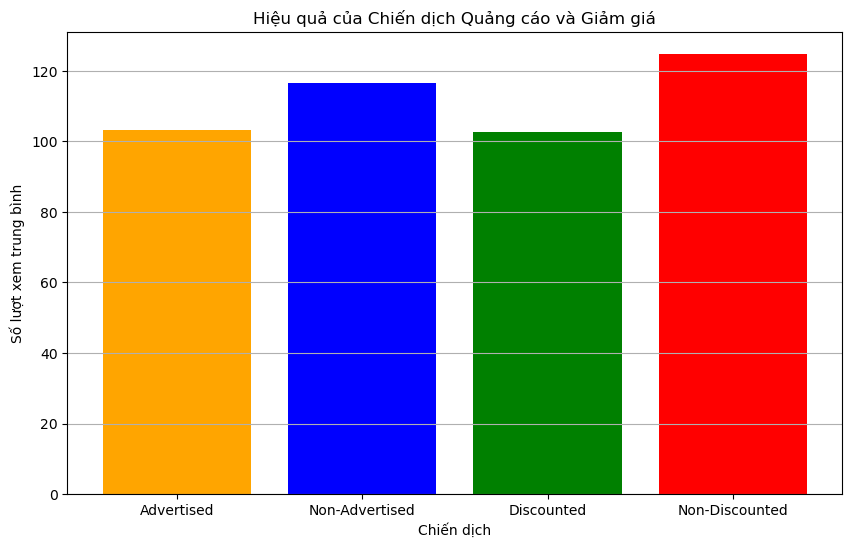

In [553]:
categories = ['Advertised', 'Non-Advertised', 'Discounted', 'Non-Discounted']
average_views = [
    advertising_effectiveness['Average Views (Advertised)'],
    advertising_effectiveness['Average Views (Non-Advertised)'],
    advertising_effectiveness['Average Views (Discounted)'],
    advertising_effectiveness['Average Views (Non-Discounted)']
]


plt.figure(figsize=(10, 6))
plt.bar(categories, average_views, color=['orange', 'blue', 'green', 'red'])
plt.title('Hiệu quả của Chiến dịch Quảng cáo và Giảm giá')
plt.xlabel('Chiến dịch')
plt.ylabel('Số lượt xem trung bình')
plt.grid(axis='y')


plt.show()

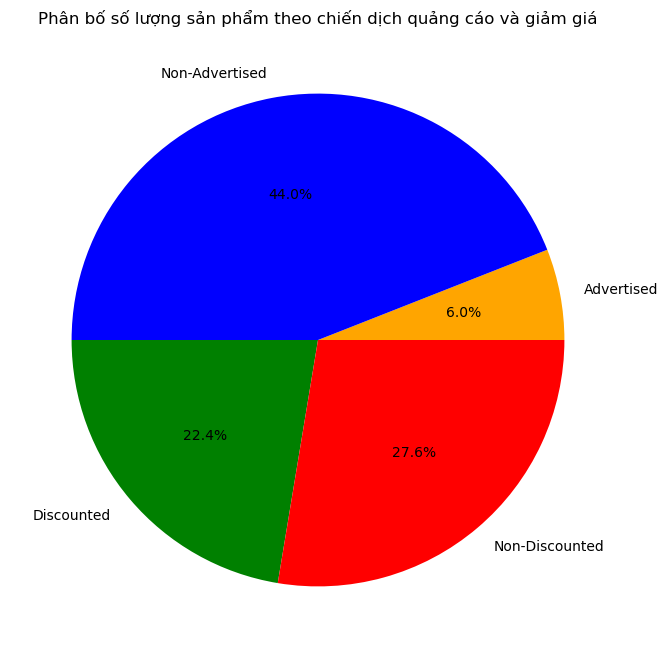

In [556]:
advertised_count = advertised_products['Name'].nunique()
non_advertised_count = non_advertised_products['Name'].nunique()
discounted_count = discounted_products['Name'].nunique()
non_discounted_count = non_discounted_products['Name'].nunique()


campaign_types = ['Advertised', 'Non-Advertised', 'Discounted', 'Non-Discounted']
product_counts = [advertised_count, non_advertised_count, discounted_count, non_discounted_count]


plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=campaign_types, autopct='%1.1f%%', colors=['orange', 'blue', 'green', 'red'])
plt.title('Phân bố số lượng sản phẩm theo chiến dịch quảng cáo và giảm giá')


plt.show()

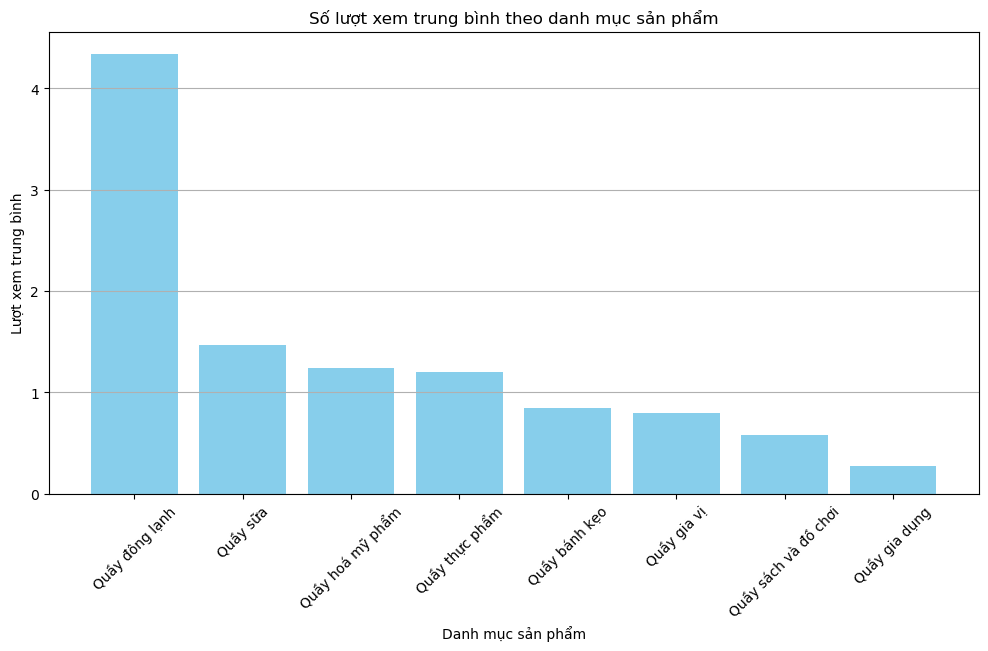

In [559]:
avg_views_by_category = data_latest.groupby('Description')['Person ID'].count().reset_index(name='Total Views')
avg_views_by_category['Average Views'] = avg_views_by_category['Total Views'] / data_latest['Description'].value_counts().values

avg_views_by_category_sorted = avg_views_by_category.sort_values(by='Average Views', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(avg_views_by_category_sorted['Description'], avg_views_by_category_sorted['Average Views'], color='skyblue')
plt.title('Số lượt xem trung bình theo danh mục sản phẩm')
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Lượt xem trung bình')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Hiển thị biểu đồ
plt.show()

Chiến dịch quảng cáo không thực sự hiệu quả:

Số lượt xem trung bình của các sản phẩm được quảng cáo (103.19) thấp hơn so với các sản phẩm không được quảng cáo (116.47).
Điều này cho thấy các chiến dịch quảng cáo hiện tại có thể không đạt được hiệu quả mong muốn. Các nguyên nhân có thể bao gồm:
Quảng cáo không nhắm đúng đối tượng khách hàng: Quảng cáo có thể không được thiết kế hoặc đặt đúng nơi để thu hút đối tượng khách hàng mục tiêu.
Sản phẩm được quảng cáo không hấp dẫn: Sản phẩm có thể không có sự khác biệt hoặc không có nhu cầu cao từ phía khách hàng.
Thiếu chiến lược quảng cáo đa dạng: Chiến lược quảng cáo hiện tại có thể không sử dụng nhiều kênh tiếp cận hoặc không tối ưu hóa được nội dung quảng cáo để thu hút khách hàng.
Giảm giá (sale) không phải lúc nào cũng thúc đẩy lượt xem:

Sản phẩm có giảm giá có lượt xem trung bình (102.73) thấp hơn so với các sản phẩm không giảm giá (124.73).
Điều này có thể gợi ý rằng giảm giá không phải lúc nào cũng là yếu tố hấp dẫn nhất đối với khách hàng. Một vài nguyên nhân có thể bao gồm:
Giảm giá không đủ hấp dẫn hoặc không phù hợp: Khách hàng có thể không cảm thấy mức giảm giá đủ lớn để thu hút họ, hoặc giảm giá không dành cho những sản phẩm họ quan tâm.
Nhận thức về chất lượng sản phẩm: Khách hàng có thể liên kết giá thấp hơn với chất lượng sản phẩm kém hơn, do đó ít quan tâm đến sản phẩm giảm giá.
Sản phẩm không cần giảm giá: Có thể các sản phẩm đã đủ phổ biến hoặc có giá trị cao nên khách hàng sẵn sàng mua mà không cần khuyến mãi.

Đối với các mặt hàng tại quầy đông lạnh, áp dụng các chương trình giảm giá thường xuyên, đặc biệt vào những dịp cuối tuần hoặc ngày lễ, khi nhu cầu nấu nướng tăng cao. Các ưu đãi như "mua 1 tặng 1", giảm giá khi mua theo số lượng lớn, hoặc tặng quà kèm theo cũng có thể khuyến khích khách hàng mua nhiều hơn.

Các danh mục có lượt xem trung bình cao, như Quầy bánh kẹo, Quầy thực phẩm, và Quầy sữa.
Đối với các danh mục này, quảng cáo sẽ giúp duy trì và tăng cường sự quan tâm của khách hàng, đặc biệt là với những sản phẩm đã phổ biến và có khả năng bán chạy

Các danh mục có lượt xem trung bình thấp, như Quầy gia dụng, Quầy sách, Quầy hóa mỹ phẩm, và Quầy gia vị.
Áp dụng giảm giá cho các sản phẩm trong những danh mục này có thể giúp khuyến khích khách hàng thử nghiệm và mua sắm nhiều hơn, từ đó tăng doanh thu.